In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import random
import math
from datetime import timedelta
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
train = pd.read_csv('../../training_set_VU_DM.csv')
test = pd.read_csv('../../test_set_VU_DM.csv')

In [21]:
# extract month and year from search date
train["date_time"] = pd.to_datetime(train["date_time"])
train["year"] = train["date_time"].dt.year
train["month"] = train["date_time"].dt.month

# extract month and year from search date
test["date_time"] = pd.to_datetime(test["date_time"])
test["year"] = test["date_time"].dt.year
test["month"] = test["date_time"].dt.month

In [22]:
# sort the positions within search IDs
train = train.sort_values(by = ['srch_id', 'position'], ascending = [True, True])

In [5]:
# skip the missing values in positions
train['data_pos'] = train.groupby('srch_id').cumcount()

         srch_id           date_time  site_id  visitor_location_country_id  \
21             1 2013-04-04 08:32:15       12                          187   
13             1 2013-04-04 08:32:15       12                          187   
8              1 2013-04-04 08:32:15       12                          187   
4              1 2013-04-04 08:32:15       12                          187   
19             1 2013-04-04 08:32:15       12                          187   
5              1 2013-04-04 08:32:15       12                          187   
18             1 2013-04-04 08:32:15       12                          187   
9              1 2013-04-04 08:32:15       12                          187   
23             1 2013-04-04 08:32:15       12                          187   
12             1 2013-04-04 08:32:15       12                          187   
14             1 2013-04-04 08:32:15       12                          187   
6              1 2013-04-04 08:32:15       12                   

In [9]:
# DOWNSAMPLING

# use all clicked data
pos_train = train[(train["click_bool"] == 1)]

# use a random sample of each search
neg_train = train.groupby('srch_id', group_keys=False).apply(lambda df: df.sample(1))

In [10]:
# combine these samples
sel_train = pd.concat([pos_train, neg_train])

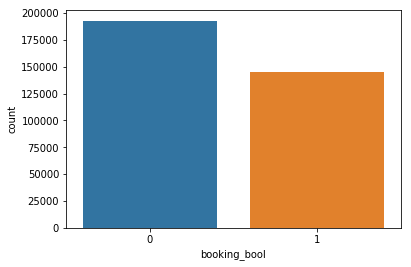

In [11]:
# view positive-negative data
sns.countplot(x = "booking_bool", data = sel_train)

In [98]:
sel_train

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,year,month
12,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,68914,2,3.0,...,NaN,NaN,0.0,0.0,11.0,1,114.29,1,2013,4
63,6,2013-06-05 12:27:51,14,100,NaN,NaN,100,104251,3,4.0,...,NaN,NaN,NaN,NaN,NaN,1,162.38,1,2013,6
68,8,2013-03-20 17:50:44,5,219,NaN,NaN,219,27669,3,3.5,...,NaN,NaN,0.0,0.0,NaN,1,96.41,1,2013,3
194,21,2013-02-18 17:16:25,15,55,NaN,NaN,216,61662,3,3.5,...,NaN,NaN,NaN,NaN,NaN,1,222.58,1,2013,2
211,25,2012-12-11 13:03:42,5,219,NaN,NaN,219,23228,4,4.0,...,NaN,NaN,0.0,0.0,NaN,1,47.10,1,2012,12
243,28,2012-11-26 10:13:17,5,219,NaN,NaN,219,13996,4,4.0,...,NaN,NaN,-1.0,0.0,9.0,1,286.32,1,2012,11
274,29,2013-02-26 19:42:22,18,129,NaN,NaN,219,1722,3,4.0,...,NaN,NaN,NaN,NaN,NaN,1,1927.64,1,2013,2
312,30,2013-02-11 01:28:38,24,216,NaN,NaN,219,125611,3,3.5,...,NaN,NaN,0.0,0.0,NaN,1,1831.30,1,2013,2
346,36,2013-04-03 08:54:17,22,92,NaN,NaN,219,15181,3,4.0,...,NaN,NaN,0.0,0.0,NaN,1,226.76,1,2013,4
387,39,2013-04-06 18:08:58,5,219,NaN,NaN,219,109855,2,3.5,...,NaN,NaN,0.0,0.0,NaN,1,60.77,1,2013,4


In [12]:
sel_train.shape

(338185, 57)

In [10]:
sel_train.corr()["position"]

srch_id                       -0.000351
site_id                       -0.001156
visitor_location_country_id    0.004326
visitor_hist_starrating        0.001917
visitor_hist_adr_usd          -0.005472
prop_country_id                0.003343
prop_id                        0.000913
prop_starrating               -0.074163
prop_review_score             -0.042967
prop_brand_bool                0.006648
prop_location_score1           0.018278
prop_location_score2          -0.132774
prop_log_historical_price     -0.009312
position                       1.000000
price_usd                     -0.000120
promotion_flag                -0.092300
srch_destination_id           -0.001057
srch_length_of_stay            0.004383
srch_booking_window           -0.000688
srch_adults_count             -0.003312
srch_children_count           -0.016117
srch_room_count               -0.017523
srch_saturday_night_bool      -0.004325
srch_query_affinity_score     -0.056210
orig_destination_distance      0.001165


In [17]:
def categorize_date(df):
    
    df['date_time_split'] = pd.to_datetime(df['date_time'])
    df['srch_month'] = df['date_time_split'].dt.month
    df['srch_year'] = df['date_time_split'].dt.year
    df['srch_hour'] = df['date_time_split'].dt.hour

#     bins = [0, 6, 12, 18, 23]
#     labels = [0, 1, 2, 3]
#     df['srch_daytime'] = pd.cut(df['srch_hour'], bins = bins, labels = labels)
    
    df['booking_month'] = (df['date_time_split'] + df['srch_booking_window'].apply(pd.offsets.Day)).dt.month

    df = df.drop(['date_time', 'srch_hour'], axis=1)
    
    return df

def categorize_prop_review_score(df):
    
    df['prop_review_score'] = df['prop_review_score'].fillna(0)
    
    return df
    
def categorize_hist_starrating(df):
    
    df['visitor_hist_starrating'] = df['visitor_hist_starrating'].fillna(-0.5)
    
    bins = [-1, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
    labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    df['vis_star'] = pd.cut(df.visitor_hist_starrating, bins, labels = labels)
    
    df['vis_star'] = df['vis_star'].astype('int64')
    
    return df.drop(['visitor_hist_starrating'], axis=1)
#     return df
    
def categorize_hist_usd(df):
    df['vis_usd'] = pd.qcut(df['visitor_hist_adr_usd'], 4, labels = [1, 2, 3, 4])
    
    df['vis_usd'] = df['vis_usd'].cat.add_categories([0])
    df['vis_usd'] = df['vis_usd'].fillna(0)
    
    df['vis_usd'] = df['vis_usd'].astype('int64')
    
    return df.drop(['visitor_hist_adr_usd'], axis=1)
#     return df
    
def categorize_prop_loc_score(df):
    
    df['prop_location_score1'] = df['prop_location_score1'].round()
    df['prop_location_score2'] = df['prop_location_score2'].fillna(df['prop_location_score2'].mean())
    df['prop_location_score2'] = df['prop_location_score2'].round(1)
    
    return df
    
def categorize_historical_price(df):
    
    df['prop_hist_price'] = pd.qcut(df['prop_log_historical_price'], 6, duplicates = 'drop', labels = [0, 1, 2, 3, 4, 5])
    
    df['prop_hist_price'] = df['prop_hist_price'].astype('int64')
    
#     return df.drop(['prop_log_historical_price'], axis=1)
    return df
    
def categorize_price_usd(df, compdf):
    
#     q = compdf['price_usd'].quantile(0.99)
#     df['price_usd'] = df[df['price_usd'] < q]
#     hotel_id = compdf.groupby(['prop_id'])
#     df['price_usd'] = hotel_id.price_usd.apply(lambda x: x.fillna(x.mean()))
    df['price_usd'] = df['price_usd'].fillna(2)
    
    df['cat_price_usd'] = pd.qcut(df['price_usd'], 6, labels = [0, 1, 2, 3, 4, 5])
    df['cat_price_usd'] = df['cat_price_usd'].fillna(5)
    
    df['cat_price_usd'] = df['cat_price_usd'].astype('int64')
    
    return df

def categorize_gross_bookings_usd(df):
    
    df['gross_price_difference'] = df['gross_bookings_usd'] - df['price_usd']
    df['gross_price_difference'] = pd.qcut(df['gross_price_difference'], 4, labels = [1, 2, 3, 4])
    df['gross_price_difference'] = df['gross_price_difference'].cat.add_categories([0])
    df['gross_price_difference'] = df['gross_price_difference'].fillna(0)
    
    df['gross_price_difference'] = df['gross_price_difference'].astype('int64')
    
    return df.drop(['gross_bookings_usd', 'price_usd'], axis=1)
    
def categorize_nights(df):
    
    df['srch_length_of_stay'] = np.where(df['srch_length_of_stay'] > 4, 5, df['srch_length_of_stay'])
    return df
    
def categorize_booking_window(df):
    
    df['srch_booking_window'] = df['srch_booking_window']/7
    df['srch_booking_window'] = df['srch_booking_window'].round(0).astype(int)
    df['srch_booking_window'] = np.where(df['srch_booking_window'] > 12, 12, df['srch_booking_window'])
    
    return df
    
def categorize_srch_count(df):
    
    df['srch_adults_count'] = np.where(df['srch_adults_count'] > 3, 3, df['srch_adults_count'])
    df['srch_children_count'] = np.where(df['srch_children_count'] > 3, 3, df['srch_children_count'])
    df['srch_room_count'] = np.where(df['srch_room_count'] > 2, 2, df['srch_room_count'])
    return df
    
def categorize_log_probs(df):
    
    df['srch_query_affinity_score'] = pd.qcut(df['srch_query_affinity_score'], 4, labels = [1, 2, 3, 4], duplicates = 'drop')
    df['srch_query_affinity_score'] = df['srch_query_affinity_score'].cat.add_categories([0])
    df['srch_query_affinity_score'] = df['srch_query_affinity_score'].fillna(0)
    
    df['srch_query_affinity_score'] = df['srch_query_affinity_score'].astype('int64')
    return df
    
def categorize_distance_hotel(df):
    
    distgroup = df.groupby(["visitor_location_country_id", "prop_country_id"])
    
    df['orig_destination_distance'] = distgroup.orig_destination_distance.apply(lambda x: x.fillna(x.mean()))
    
#     df['orig_destination_distance'] = df['orig_destination_distance'].fillna()
    
    df['orig_destination_distance'] = pd.qcut(df['orig_destination_distance'], 6, labels = [1, 2, 3, 4, 5, 6])
    df['orig_destination_distance'] = df['orig_destination_distance'].cat.add_categories([0])
    df['orig_destination_distance'] = df['orig_destination_distance'].fillna(0)
    
    df['orig_destination_distance'] = df['orig_destination_distance'].astype('int64')
    
    return df
    
def categorize_comp_rates(df):
    
    
    df['all_comp_rates'] = df[['comp1_rate', 'comp2_rate', 'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate','comp8_rate']].min(axis=1)
    df['all_comp_rates'] = df['all_comp_rates'].fillna(2)
    
    df.update(df[['comp1_rate', 'comp2_rate', 'comp3_rate','comp4_rate','comp5_rate','comp6_rate','comp7_rate','comp8_rate']].fillna(0))
    
    df['count_comp_rates'] = df['comp1_rate'] + df['comp2_rate'] + df['comp3_rate'] + df['comp4_rate'] + df['comp5_rate'] + df['comp6_rate'] + df['comp7_rate'] + df['comp8_rate']
    df = df.drop(['comp1_rate', 'comp2_rate', 'comp3_rate','comp4_rate','comp5_rate','comp6_rate','comp7_rate','comp8_rate'], axis=1)
    return df
    
def categorize_comp_inv(df):
    
    df.update(df[['comp1_inv', 'comp2_inv', 'comp3_inv','comp4_inv','comp5_inv','comp6_inv','comp7_inv','comp8_inv']].fillna(0))
    
    df['count_comp_inv'] = df['comp1_inv'] + df['comp2_inv'] + df['comp3_inv'] + df['comp4_inv'] + df['comp5_inv'] + df['comp6_inv'] + df['comp7_inv'] + df['comp8_inv']
    df = df.drop(['comp1_inv', 'comp2_inv', 'comp3_inv','comp4_inv','comp5_inv','comp6_inv','comp7_inv','comp8_inv'], axis=1)
    return df
    
def categorize_comp_perc(df):
    
    df['comps_perc_diff'] = df[['comp1_rate_percent_diff', 'comp2_rate_percent_diff','comp3_rate_percent_diff','comp4_rate_percent_diff','comp5_rate_percent_diff','comp6_rate_percent_diff','comp7_rate_percent_diff','comp8_rate_percent_diff']].mean(axis=1)
    df['comps_perc_diff'] = pd.qcut(df['comps_perc_diff'], 4, labels = [1, 2, 3, 4])
    df['comps_perc_diff'] = df['comps_perc_diff'].cat.add_categories([0])
    df['comps_perc_diff'] = df['comps_perc_diff'].fillna(0)
    df = df.drop(['comp1_rate_percent_diff', 'comp2_rate_percent_diff','comp3_rate_percent_diff','comp4_rate_percent_diff','comp5_rate_percent_diff','comp6_rate_percent_diff','comp7_rate_percent_diff','comp8_rate_percent_diff'], axis=1)
    
    df['comps_perc_diff'] = df['comps_perc_diff'].astype('int64')
    
    return df

def book_click(df):
    
    df["book_click"] = df["booking_bool"] + df["click_bool"]
    
    return df
    


In [18]:
pd.options.mode.chained_assignment = None  # default='warn'

hotels = sel_train

hotels = categorize_prop_review_score(hotels)
hotels = categorize_date(hotels)
hotels = categorize_hist_starrating(hotels)
hotels = categorize_hist_usd(hotels)
hotels = categorize_prop_loc_score(hotels)
hotels = categorize_historical_price(hotels)
hotels = categorize_price_usd(hotels, train)
hotels = categorize_gross_bookings_usd(hotels)
hotels = categorize_nights(hotels)
hotels = categorize_booking_window(hotels)
hotels = categorize_srch_count(hotels)
hotels = categorize_log_probs(hotels)
hotels = categorize_distance_hotel(hotels)
hotels = categorize_comp_rates(hotels)
hotels = categorize_comp_inv(hotels)
hotels = categorize_comp_perc(hotels)
hotels = book_click(hotels)

ValueError: cannot reindex from a duplicate axis

In [76]:
pd.options.mode.chained_assignment = None  # default='warn'

sel_test = train

sel_test = categorize_prop_review_score(sel_test)
sel_test = categorize_date(sel_test)
sel_test = categorize_hist_starrating(sel_test)
sel_test = categorize_hist_usd(sel_test)
sel_test = categorize_prop_loc_score(sel_test)
sel_test = categorize_historical_price(sel_test)
sel_test = categorize_price_usd(sel_test)
# test = categorize_gross_bookings_usd(test)
sel_test = categorize_nights(sel_test)
sel_test = categorize_booking_window(sel_test)
sel_test = categorize_srch_count(sel_test)
sel_test = categorize_log_probs(sel_test)
sel_test = categorize_distance_hotel(sel_test)
sel_test = categorize_comp_rates(sel_test)
sel_test = categorize_comp_inv(sel_test)
sel_test = categorize_comp_perc(sel_test)
# test = book_click(hotels)

In [77]:
X_train = hotels.drop(['srch_id', 'booking_bool', 'click_bool', 'book_click', 'position', 'date_time_split'], axis=1)
Y_train = hotels['book_click']
X_test = sel_test.drop(['srch_id', 'date_time_split'], axis=1)


# X_train.drop(X_train.select_dtypes(['float64', 'category', 'datetime64[ns]']), inplace=True, axis=1)
# X_test.drop(X_test.select_dtypes(['float64', 'category', 'datetime64[ns]']), inplace=True, axis=1)

# print(X_test.dtypes)
# print(X_train.dtypes)
X_train.shape, Y_train.shape, X_test.shape

# X_test.isna().sum()

# print(X_train)

((2963018, 35), (2963018,), (4959183, 35))

In [89]:
k_X_train = hotels[0:round(2963018*0.8)].drop(['srch_id', 'booking_bool', 'click_bool', 'book_click', 'position', 'date_time_split'], axis=1)
k_Y_train = hotels[0:round(2963018*0.8)]['book_click']
k_X_test = hotels[round(2963018*0.8):2963018].drop(['srch_id', 'booking_bool', 'click_bool', 'book_click', 'position', 'date_time_split'], axis=1)


k_X_train.shape, k_Y_train.shape, k_X_test.shape

((2370414, 35), (2370414,), (592604, 35))

In [90]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=10, max_depth=None)
scores = cross_val_score(clf, k_X_train, k_Y_train)
print(scores.mean())

classifier = clf.fit(k_X_train, k_Y_train)
predictions = classifier.predict_proba(k_X_test)
print(type(predictions))

C:\Users\tessa\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9687619932994539
<class 'numpy.ndarray'>


In [78]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=10, max_depth=None)
scores = cross_val_score(clf, X_train, Y_train)
print(scores.mean())

classifier = clf.fit(X_train, Y_train)
predictions = classifier.predict_proba(X_test)
print(type(predictions))

C:\Users\tessa\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.960710997459607
<class 'numpy.ndarray'>


In [79]:
print(predictions)

testing_pred = test[["srch_id", "prop_id"]]

testing_pred = pd.concat([testing_pred, pd.DataFrame(predictions)], axis=1)


testing_pred.columns = ['srch_id', 'prop_id', 'none', 'book', 'click']
# testing_pred.rename(testing_pred.columns[3])
# testing_pred = testing_pred.join(pd.DataFrame(predictions), rsuffix='_')

print(testing_pred)
# print(sum(predictions))

# testing_pred.to_csv('testing_pred.csv', index = False)  

[[0.8 0.1 0.1]
 [1.  0.  0. ]
 [1.  0.  0. ]
 ...
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.  1. ]]
         srch_id  prop_id  none  book  click
0              1     3180   0.8   0.1    0.1
1              1     5543   1.0   0.0    0.0
2              1    14142   1.0   0.0    0.0
3              1    22393   1.0   0.0    0.0
4              1    24194   0.9   0.1    0.0
5              1    28181   0.8   0.1    0.1
6              1    34263   1.0   0.0    0.0
7              1    37567   1.0   0.0    0.0
8              1    50162   1.0   0.0    0.0
9              1    54937   0.9   0.1    0.0
10             1    56050   0.9   0.0    0.1
11             1    61632   1.0   0.0    0.0
12             1    61934   0.9   0.1    0.0
13             1    63894   0.9   0.1    0.0
14             1    72090   0.9   0.1    0.0
15             1    73666   0.8   0.2    0.0
16             1    74045   0.8   0.2    0.0
17             1    78599   1.0   0.0    0.0
18             1    82231   0.9   0.1    0.0
19  

In [80]:
result = testing_pred.sort_values(by = ['srch_id', "book", "click"], ascending = [True, False, False])
result

,srch_id,prop_id,none,book,click
15,1,73666,0.8,0.2,0.0
16,1,74045,0.8,0.2,0.0
0,1,3180,0.8,0.1,0.1
5,1,28181,0.8,0.1,0.1
4,1,24194,0.9,0.1,0.0
9,1,54937,0.9,0.1,0.0
12,1,61934,0.9,0.1,0.0
13,1,63894,0.9,0.1,0.0
14,1,72090,0.9,0.1,0.0
18,1,82231,0.9,0.1,0.0


In [81]:
result = result.drop(["none", "book", "click"], axis = 1)

In [82]:
result.to_csv('result_pred.csv', index = False)  